In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# No object type feature. Total 11 features and 1 target which is quality

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.quality.value_counts().sort_values()

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

<Axes: >

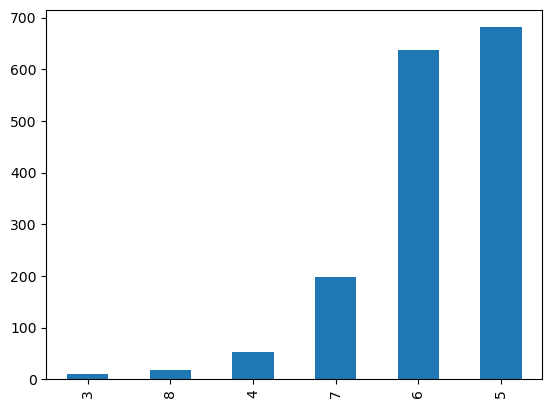

In [9]:
df.quality.value_counts().sort_values().plot(kind="bar")

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#No missing values are present in the dataset

# Data Analysis

In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [19]:
df.corr()["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Text(0.5, 1.0, 'correlation of features with wine quality')

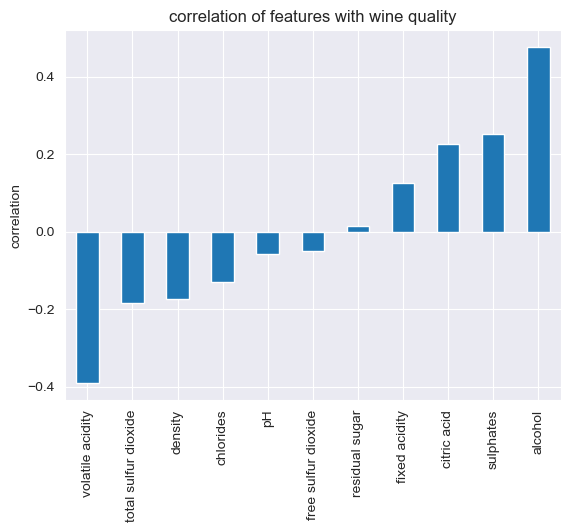

In [20]:
sns.set_style("darkgrid")
df.corr()["quality"][:-1].sort_values().plot(kind="bar")
plt.ylabel("correlation")
plt.title("correlation of features with wine quality")

<Axes: >

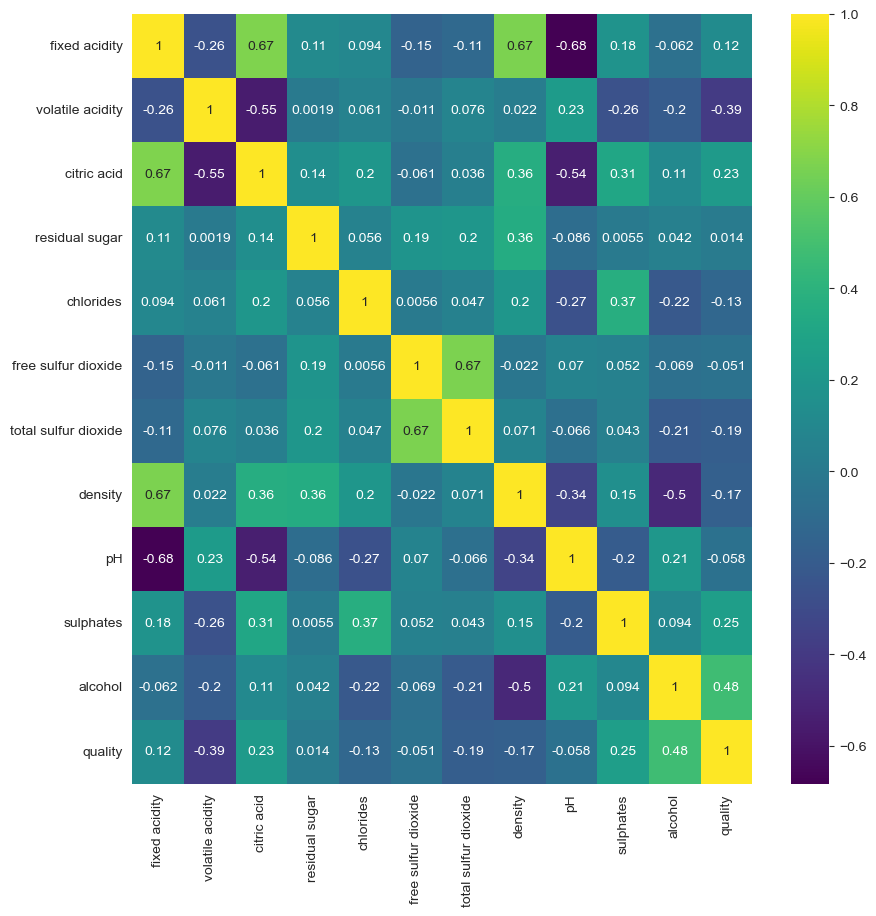

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap="viridis" )

From the correlation graph it is evident that Alcohol is positively correlated with wine quality and volatile acidity is highly negatively correlated with wine quality.

In [24]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [25]:
df.groupby('quality').std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,1.770875,0.331256,0.250664,1.401596,0.066241,9.763879,16.828877,0.002002,0.144052,0.122020,0.818009
4,1.626624,0.220110,0.201030,1.789436,0.076192,9.025926,27.583374,0.001575,0.181441,0.239391,0.934776
5,1.563988,0.164801,0.180003,1.359753,0.053707,10.955446,36.993116,0.001589,0.150618,0.171062,0.736521
6,1.797849,0.160962,0.195108,1.441576,0.039563,9.940911,25.038250,0.002000,0.153995,0.158650,1.049639
7,1.992483,0.145224,0.194432,1.371509,0.029456,10.175255,33.191206,0.002176,0.150101,0.135639,0.961933
8,2.119656,0.144914,0.199526,1.295038,0.011678,11.155613,25.433240,0.002378,0.200640,0.115379,1.224011


In [18]:
#Looking at the features one by one

In [30]:
df["fixed acidity"].nunique()

96

<Axes: ylabel='Frequency'>

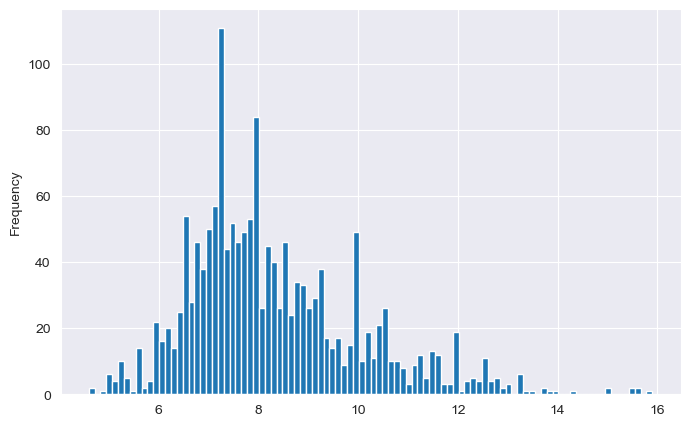

In [60]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
df["fixed acidity"].plot(kind="hist", bins=96)

In [28]:
df.alcohol.value_counts()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64

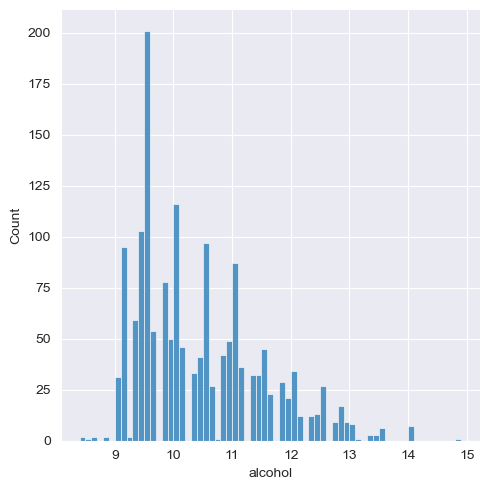

In [62]:
sns.set_style("darkgrid")
sns.displot(x="alcohol",data=df, bins=65)
plt.xlabel("alcohol")
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

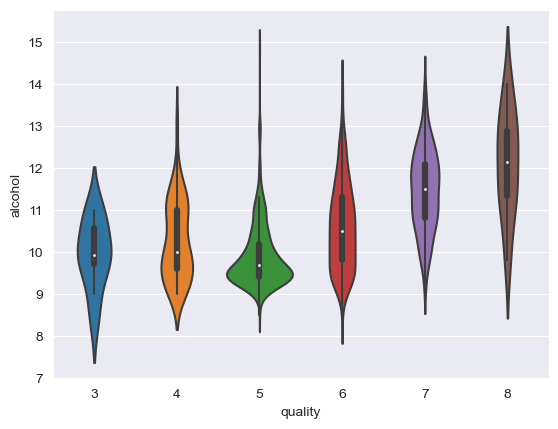

In [70]:
sns.violinplot(y=df.alcohol,x=df.quality)

In [53]:
df["volatile acidity"].value_counts()

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64

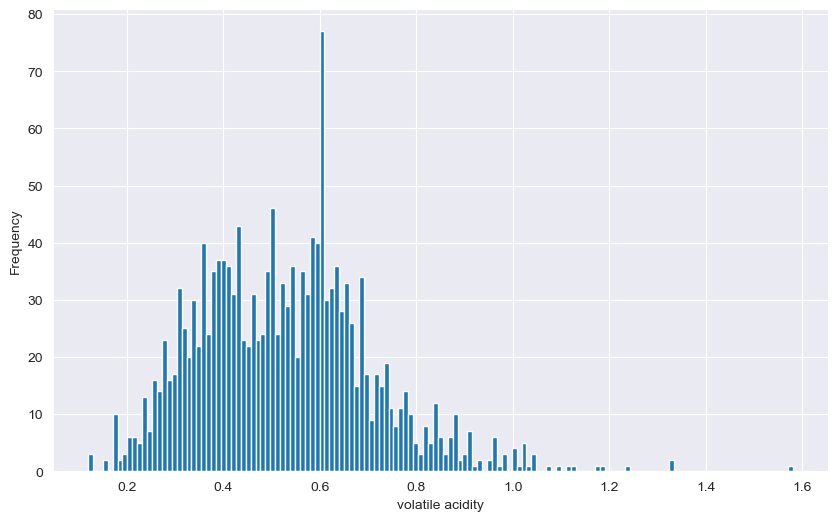

In [58]:
plt.figure(figsize=(10,6))
df["volatile acidity"].plot(kind="hist", bins=143)
plt.xlabel("volatile acidity")
plt.show()

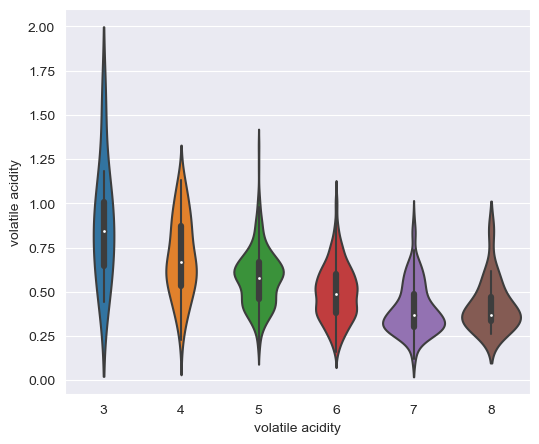

In [75]:
plt.figure(figsize=(6,5))
sns.violinplot(x="quality",y="volatile acidity", data=df)
plt.xlabel("volatile acidity")
plt.show()

In [65]:
df.density.value_counts()

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64

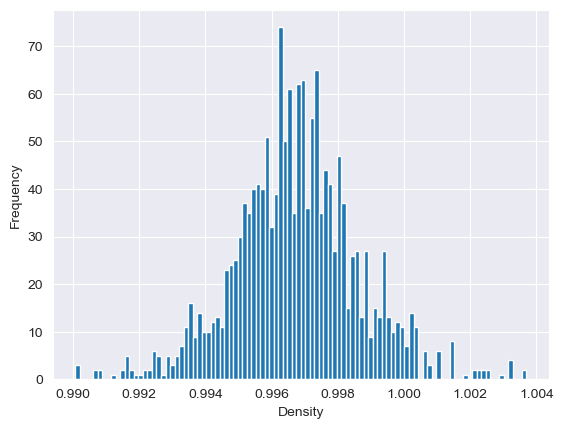

In [67]:
df.density.plot(kind="hist", bins=100)
plt.xlabel("Density")
plt.show()

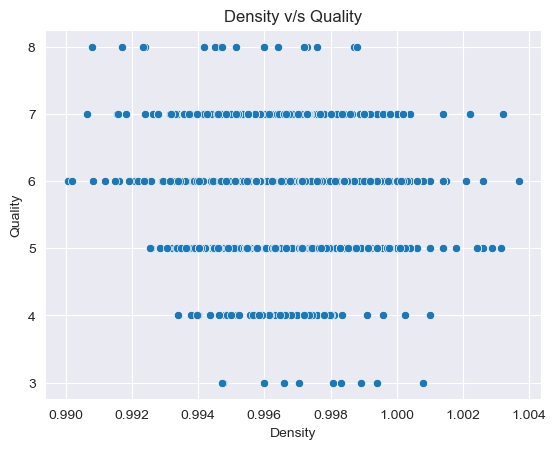

In [68]:
sns.scatterplot(x="density",y="quality",data=df)
plt.xlabel("Density")
plt.ylabel("Quality")
plt.title("Density v/s Quality")
plt.show()


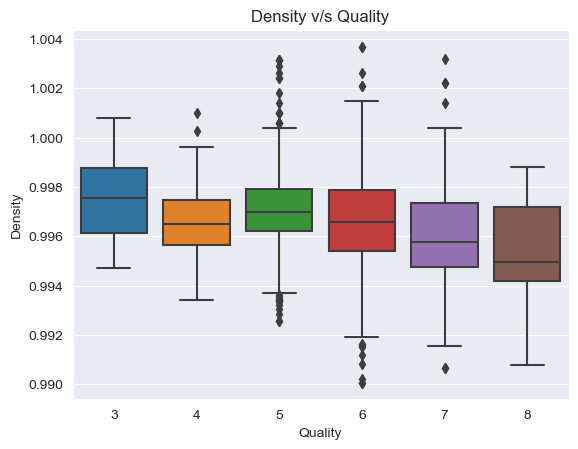

In [77]:
sns.boxplot(y="density",x="quality",data=df)
plt.ylabel("Density")
plt.xlabel("Quality")
plt.title("Density v/s Quality")
plt.show()


Considering wine with quality equal to or above 7 as good quality and below it as bad quality, we will trian our models using different algorithm and see which one gives the most accurate prediction and classification report

In [105]:
def quality(quality):
    if quality >= 7:
        return 1
    else:
        return 0


In [106]:
df["goodquality"] = df["quality"].apply(lambda x: quality(x))

In [107]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [108]:
print(df.groupby("goodquality").max()["quality"])
print("\n")
print(df.groupby("goodquality").min()["quality"])

goodquality
0    6
1    8
Name: quality, dtype: int64


goodquality
0    3
1    7
Name: quality, dtype: int64


In [109]:
X = df.drop(["quality","goodquality"],axis=1)
y = df["goodquality"]

# Train_Test_Split

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# LogisticRegression

In [112]:
from sklearn.linear_model import LogisticRegression

In [139]:
lgr = LogisticRegression(solver='lbfgs', max_iter=500).fit(X_train,y_train)

In [140]:
lgr_predict = lgr.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

In [142]:
print('The accuracy score is:', accuracy_score(y_test,lgr_predict))

The accuracy score is: 0.8791666666666667


In [144]:
print('The classification report is:', "\n", classification_report(y_test,lgr_predict))

The classification report is: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       417
           1       0.58      0.30      0.40        63

    accuracy                           0.88       480
   macro avg       0.74      0.63      0.66       480
weighted avg       0.86      0.88      0.86       480



In [145]:
print('The confusion matrix is:', "\n", confusion_matrix(y_test,lgr_predict))

The confusion matrix is: 
 [[403  14]
 [ 44  19]]


# KNN

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
data = df.copy()

In [151]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [149]:
M = data.drop(["quality", "goodquality"], axis=1)
n = data["goodquality"]

In [150]:
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.3, random_state=7)

In [152]:
scaler_train = StandardScaler().fit_transform(M_train)

In [155]:
train_set = pd.DataFrame(scaler_train, columns=data.columns[:-2])

In [156]:
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.653919,-0.771127,1.017347,1.446437,0.129037,-1.240259,-1.115660,-0.185166,-0.289651,-0.094425,1.674244
1,0.423651,0.050836,1.173109,0.245592,0.129037,2.363684,1.884782,0.773020,-1.511289,-0.272307,-1.121715
2,-0.267154,0.050836,-0.021065,-0.390150,0.002893,0.656553,0.024508,0.720081,0.610503,0.498514,-1.121715
3,1.920395,-0.629410,1.380791,0.528144,0.360300,1.604959,1.524729,2.255296,-0.739728,1.743687,-1.121715
4,-0.324722,0.390959,-1.059477,-0.390150,-0.186322,0.277190,-0.185523,0.121877,0.481909,-0.213013,-0.282927


In [157]:
scaler_test = StandardScaler().fit_transform(M_test)
test_set = pd.DataFrame(scaler_test, columns=data.columns[:-2])

In [158]:
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.946875,-0.272515,-1.042278,-0.220366,-0.492050,0.253716,-0.214073,-0.655239,-0.012820,-0.077882,-0.830124
1,1.349739,-0.651509,0.618489,-0.220366,-0.055521,-0.820988,-0.875179,0.870215,-1.468536,0.038941,-1.116958
2,-0.774629,-1.355356,1.574687,-0.292078,-0.273786,0.156015,-0.623329,0.732021,0.516531,0.331000,0.125988
3,-0.372721,0.377190,-0.539015,-0.148654,-0.230133,0.156015,0.289628,0.391850,0.847376,-0.428353,-0.447679
4,-0.717213,0.539616,-1.394561,-0.148654,-0.470224,-0.723288,0.037778,-1.829892,0.119518,-0.895647,1.273322


In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
model = KNeighborsClassifier(n_neighbors=5).fit(train_set,n_train)

In [161]:
y_predict = model.predict(test_set)

In [162]:
print('The accuracy score is:', accuracy_score(n_test,y_predict))

The accuracy score is: 0.8645833333333334


In [167]:
error_rate =[]
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=5).fit(train_set,n_train)
    y_predict = model.predict(test_set)
    error_rate.append(np.mean(y_predict!=n_test))

PLotting error rate

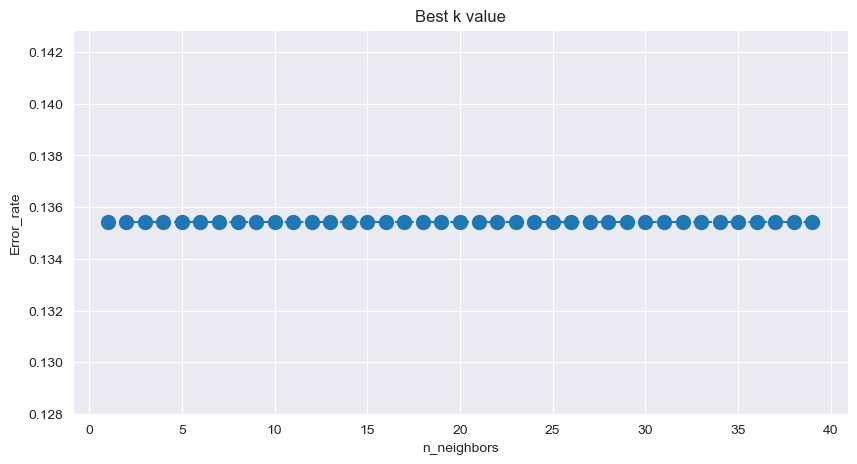

In [169]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate, linestyle="dashed", marker ="o", markersize ="10")
plt.xlabel("n_neighbors")
plt.ylabel("Error_rate")
plt.title("Best k value")
plt.show()


By the graph it is evident that changing K values doesn't effects the accuracy or the error_rate of the model. Hence the accuracy score for the model remains: 0.8645833333333334

In [170]:
print('The classification report is:', "\n", classification_report(n_test,y_predict))

The classification report is: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       417
           1       0.48      0.40      0.43        63

    accuracy                           0.86       480
   macro avg       0.70      0.67      0.68       480
weighted avg       0.85      0.86      0.86       480



In [171]:
print('The confusion matrix is:', "\n", confusion_matrix(n_test,y_predict))

The confusion matrix is: 
 [[390  27]
 [ 38  25]]


# Support vector machine

In [199]:
#The binary classifier algorithm.

In [172]:
from sklearn.svm import SVC

In [173]:
y_pred = SVC().fit(X_train,y_train).predict(X_test)

In [177]:
print('The accuracy score is:', accuracy_score(y_test,y_pred))

The accuracy score is: 0.86875


In [182]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [183]:
print('The classification report is:', "\n", classification_report(y_test,y_pred))

The classification report is: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       417
           1       0.00      0.00      0.00        63

    accuracy                           0.87       480
   macro avg       0.43      0.50      0.46       480
weighted avg       0.75      0.87      0.81       480



In [184]:
print('The confusion matrix is:', "\n", confusion_matrix(y_test,y_pred))

The confusion matrix is: 
 [[417   0]
 [ 63   0]]


As the model attained an accuracy of 87% yet is the model has failed to predict any good quality wine and hence the model cannot be consided as a good predictive model.
To make it a better performing model we can perform grid search to find the best balance between bias and variance by choosing various values for C and gamma

Grid_Search

In [188]:
param = {"C":[0.01,0.1,1,10,100,1000,10000], "gamma":[10,1,0.1,0.01,0.001,0.001,0.0001], "kernel":["rbf"]}

In [189]:
from sklearn.model_selection import GridSearchCV

In [190]:
model = GridSearchCV(SVC(), param, refit =True).fit(X_train,y_train)

In [192]:
model.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [193]:
model.best_estimator_

SVC(C=10, gamma=1)

In [194]:
y_pred = model.predict(X_test)

In [195]:
print('The accuracy score is:', accuracy_score(y_test,y_pred))

The accuracy score is: 0.89375


In [196]:
print('The classification report is:', "\n", classification_report(y_test,y_pred))

The classification report is: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       417
           1       0.75      0.29      0.41        63

    accuracy                           0.89       480
   macro avg       0.83      0.64      0.68       480
weighted avg       0.88      0.89      0.87       480



In [197]:
print('The confusion matrix is:', "\n", confusion_matrix(y_test,y_pred))

The confusion matrix is: 
 [[411   6]
 [ 45  18]]


By Grid search and best fit trading between values for C and gamma we have greatly imporved on our prediction as evident by confusion matrix and classification report. even though the accuracy score has meraly increased by 2-3% but the precision and recall value for good quality wine has improved 75 and 29 times respectively as compared to previous SVM where both the precision and recall values were 0.0

# Decision Trees

In [202]:
from sklearn.tree import DecisionTreeClassifier

In [206]:
model_pred = DecisionTreeClassifier().fit(X_train,y_train).predict(X_test)

In [209]:
print('The accuracy score is:', accuracy_score(y_test,model_pred))

The accuracy score is: 0.86875


In [210]:
print('The classification report is:', "\n", classification_report(y_test,model_pred))

The classification report is: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       417
           1       0.50      0.65      0.57        63

    accuracy                           0.87       480
   macro avg       0.72      0.78      0.74       480
weighted avg       0.89      0.87      0.88       480



In [ ]:
# poor precision and recall value for good quality wine. Overall accuracy of 87%. 

In [212]:
print('The confusion matrix is:', "\n", confusion_matrix(y_test,model_pred))

The confusion matrix is: 
 [[376  41]
 [ 22  41]]


Since a single decision tree has shown high False positive: 41 and decreased true positive: 376 as compared to other algorithm.

We will use Ensemble algorithms like random forest classifier and Gradient boosting classification algorithms to include multiple weak trees to see if using multiple trees and majority vote helps in overcoming biases, and performs better predictions.

Using Ensemble Algorithms 

In [214]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest Classifier

In [227]:
model_pred = RandomForestClassifier(n_estimators=100,random_state=7, verbose=3).fit(X_train,y_train).predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [228]:
print('The accuracy score is:', accuracy_score(y_test,model_pred))

The accuracy score is: 0.9041666666666667


In [229]:
print('The confusion matrix is:', "\n", confusion_matrix(y_test,model_pred))

The confusion matrix is: 
 [[401  16]
 [ 30  33]]


In [230]:
print('The classification report is:', "\n", classification_report(y_test,model_pred))

The classification report is: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       417
           1       0.67      0.52      0.59        63

    accuracy                           0.90       480
   macro avg       0.80      0.74      0.77       480
weighted avg       0.90      0.90      0.90       480



# Gradient Boosting Classifier

In [296]:
params = {
    "n_estimators": 375,
    "learning_rate":0.1,
    "verbose":3,
    "loss":"log_loss"
}

In [297]:
model = GradientBoostingClassifier(**params).fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7347            2.07s
         2           0.6887            1.70s
         3           0.6546            1.62s
         4           0.6273            1.53s
         5           0.6033            1.46s
         6           0.5845            1.41s
         7           0.5680            1.38s
         8           0.5499            1.37s
         9           0.5353            1.35s
        10           0.5229            1.37s
        11           0.5122            1.37s
        12           0.5022            1.43s
        13           0.4918            1.51s
        14           0.4836            1.53s
        15           0.4757            1.51s
        16           0.4689            1.48s
        17           0.4625            1.44s
        18           0.4549            1.41s
        19           0.4476            1.39s
        20           0.4407            1.39s
        21           0.4356            1.37s
        2

       202           0.1329            0.54s
       203           0.1322            0.53s
       204           0.1313            0.53s
       205           0.1306            0.53s
       206           0.1300            0.53s
       207           0.1294            0.52s
       208           0.1291            0.52s
       209           0.1290            0.52s
       210           0.1281            0.51s
       211           0.1279            0.51s
       212           0.1270            0.51s
       213           0.1265            0.50s
       214           0.1250            0.50s
       215           0.1242            0.50s
       216           0.1234            0.49s
       217           0.1224            0.49s
       218           0.1220            0.49s
       219           0.1215            0.48s
       220           0.1208            0.48s
       221           0.1197            0.48s
       222           0.1190            0.47s
       223           0.1180            0.47s
       224

In [298]:
y_pred1 = model.predict(X_test)

In [299]:
print('The accuracy score is:', accuracy_score(y_test,y_pred1))

The accuracy score is: 0.9020833333333333


In [300]:
test_score = np.ones((params["n_estimators"]), dtype=np.float64)

In [301]:
y_pred= model.staged_predict(X_test)

In [302]:
for i, j in enumerate(y_pred):
    test_score[i] = accuracy_score(j,y_test)

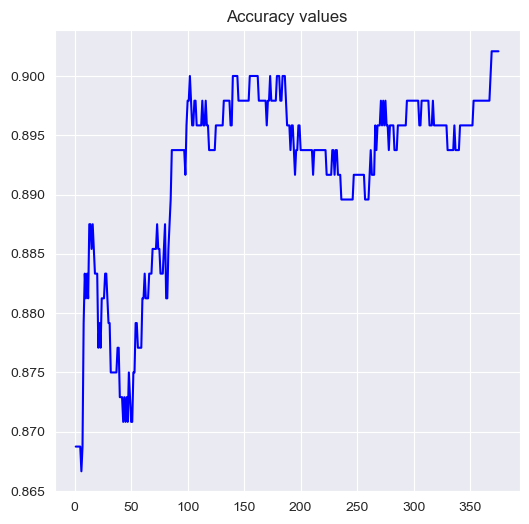

In [303]:
plt.figure(figsize=(6, 6))
plt.title("Accuracy values")
plt.plot(
    np.arange(params["n_estimators"])+1,
    test_score,
    "b-",
    label="Accuracy",
)

In [304]:
print('The classification report is:', "\n", classification_report(y_test,y_pred1))

The classification report is: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       417
           1       0.63      0.60      0.62        63

    accuracy                           0.90       480
   macro avg       0.79      0.78      0.78       480
weighted avg       0.90      0.90      0.90       480



In [305]:
print('The confusion matrix is:', "\n", confusion_matrix(y_test,y_pred1))

The confusion matrix is: 
 [[395  22]
 [ 25  38]]


In [306]:
M_Accuracy = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree','Random Forest','Gradient boosting Classifier'],
    'Score': [0.8791,0.8645,0.8937,0.8687,0.9041,0.9020]})

df_res = M_Accuracy.sort_values(by='Score', ascending=False)
df_res = df_res.set_index('Model')
df_res

,Score
Model,
Random Forest,0.9041
Gradient boosting Classifier,0.9020
SVC,0.8937
Logistic Regression,0.8791
Decision Tree,0.8687
KNN,0.8645


# Since both Random forest and Gradient Boosting classifier gives an accuracy score of above 0.90, We can use either of the classification algorithm for predicting the quality of the wine.
Out of Random forest and Gradient Boosting classifier, if we look at the confusion matrix and classification report we can choose Random forest algorithm over gradient boosting algorithm as it random forst predicts more true positives than gradient boosting algorithm

# Feature Importance

Text(0.5, 1.0, 'Feature Importance')

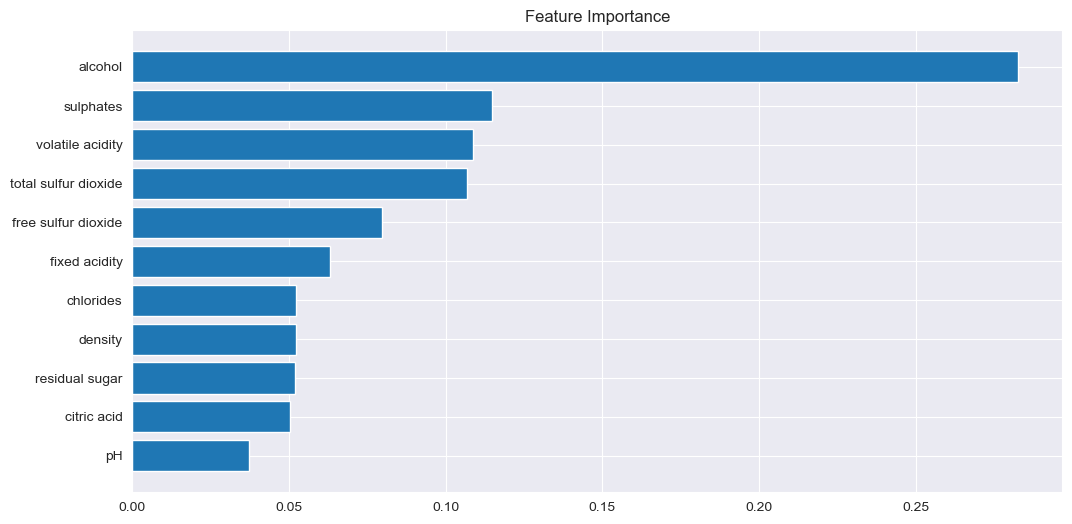

In [310]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title("Feature Importance")